# DataSet explanation:

## The columns:
###**For Generation Data**:

DATE_TIME:  Date and time for each observation. Observations recorded at 15 minute intervals.

PLANT_ID : ID of Solar Power Plant (common for the entire file)

SOURCE_KEY: Inverter ID

DC_POWER: Amount of DC power input to the inverter (SOURCE_KEY) at interval (in kW)

AC_POWER: Amount of AC power generated by the inverter (SOURCE_KEY) at interval (in kW)

DAILY_YIELD: Cumulative sum of power generated on that day, till that point in time

TOTAL_YIELD: Total yield for the inverter till that point in time

###**For Weather Sensor Data**
DATE_TIME:  Date and time for each observation. Observations recorded at 15 minute intervals

PLANT_ID: ID of Solar Power Plant (common for the entire file)

SOURCE_KEY: Sensor panel ID (Common for entire file, only one type of sensor panel for the plant)

AMBIENT_TEMPERATURE: Ambient temperature at the plant

MODULE_TEMPERATURE: Temperature reading for module attached to the sensor panel

IRRADIATION: Amount of irradiation for the 15 minute interval


# import libraries and Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
generation_data1= pd.read_csv('/Users/afnanalamri/Renewable_Energy/raw_data/Plant_1_Generation_Data.csv')

In [3]:
generation_data2= pd.read_csv('/Users/afnanalamri/Renewable_Energy/raw_data/Plant_2_Generation_Data.csv')

In [4]:
weather_data1= pd.read_csv('/Users/afnanalamri/Renewable_Energy/raw_data/Plant_1_Weather_Sensor_Data.csv')

In [5]:
weather_data2= pd.read_csv('/Users/afnanalamri/Renewable_Energy/raw_data/Plant_2_Weather_Sensor_Data.csv')

# EDA for Power Generation with Plant_ID `4135001`

In [6]:
generation_data1.head(5)

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [7]:
generation_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB


In [8]:
generation_data1['DATE_TIME'] = pd.to_datetime(generation_data2['DATE_TIME'], format='%Y-%m-%d %H:%M:%S')

In [9]:
generation_data1.describe()

,DATE_TIME,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
count,67698,68778.0,68778.000000,68778.000000,68778.000000,6.877800e+04
mean,2020-06-01 10:44:33.650625024,4135001.0,3147.426211,307.802752,3295.968737,6.978712e+06
min,2020-05-15 00:00:00,4135001.0,0.000000,0.000000,0.000000,6.183645e+06
25%,2020-05-23 21:00:00,4135001.0,0.000000,0.000000,0.000000,6.512003e+06
50%,2020-06-01 23:00:00,4135001.0,429.000000,41.493750,2658.714286,7.146685e+06
75%,2020-06-09 23:30:00,4135001.0,6366.964286,623.618750,6274.000000,7.268706e+06
max,2020-06-17 23:45:00,4135001.0,14471.125000,1410.950000,9163.000000,7.846821e+06
std,NaN,0.0,4036.457169,394.396439,3145.178309,4.162720e+05


Note the difference between mean DC_power and AC_power is very big

# EDA for Power Generation with Plant_ID `4136001`

In [10]:
generation_data2.head(5)

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06
1,2020-05-15 00:00:00,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09
2,2020-05-15 00:00:00,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09
3,2020-05-15 00:00:00,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06
4,2020-05-15 00:00:00,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07


In [11]:
generation_data2.describe()

,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
count,67698.0,67698.000000,67698.000000,67698.000000,6.769800e+04
mean,4136001.0,246.701961,241.277825,3294.890295,6.589448e+08
std,0.0,370.569597,362.112118,2919.448386,7.296678e+08
min,4136001.0,0.000000,0.000000,0.000000,0.000000e+00
25%,4136001.0,0.000000,0.000000,272.750000,1.996494e+07
50%,4136001.0,0.000000,0.000000,2911.000000,2.826276e+08
75%,4136001.0,446.591667,438.215000,5534.000000,1.348495e+09
max,4136001.0,1420.933333,1385.420000,9873.000000,2.247916e+09


In [12]:
generation_data2['DATE_TIME'] = pd.to_datetime(generation_data2['DATE_TIME'], format='%Y-%m-%d %H:%M:%S')

# The difference beteewn Plant_ID `4135001` and PLant_ID `4136001`




Note that here the averge of DC_power Plant_ID *4136001* is lower than DC_power in Plant_ID *4135001* even thogh the daily prodacton `DAILY_YIELD` have the same in both Plant_ID, so I will detect the difference

In [13]:
weather_data2['DATE_TIME'] = pd.to_datetime(weather_data2['DATE_TIME'], format='%Y-%m-%d %H:%M:%S')

In [14]:
weather_data1['DATE_TIME'] = pd.to_datetime(weather_data1['DATE_TIME'], format='%Y-%m-%d %H:%M:%S')

In [15]:
solar1 = pd.merge(generation_data1.drop(columns = ['PLANT_ID']), weather_data1.drop(columns = ['PLANT_ID', 'SOURCE_KEY']), on='DATE_TIME')


In [16]:
solar1['PLANT_ID'] = 4135001

In [17]:
solar = pd.merge(generation_data2.drop(columns = ['PLANT_ID']), weather_data2.drop(columns = ['PLANT_ID', 'SOURCE_KEY']), on='DATE_TIME')


In [18]:
solar['PLANT_ID'] = 4136001

In [19]:
combined_data = pd.concat([solar1, solar], ignore_index=True)

In [20]:
combined_data['PLANT_ID'].value_counts()

PLANT_ID
4136001    67698
4135001    66172
Name: count, dtype: int64

In [21]:
combined_data['Plant_Encoded'] = combined_data['PLANT_ID'].map({ 4135001:0 , 4136001:1 })

In [22]:
combined_data.head()

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,PLANT_ID,Plant_Encoded
0,2020-05-15,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,25.184316,22.857507,0.0,4135001,0
1,2020-05-15,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,25.184316,22.857507,0.0,4135001,0
2,2020-05-15,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,25.184316,22.857507,0.0,4135001,0
3,2020-05-15,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,25.184316,22.857507,0.0,4135001,0
4,2020-05-15,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,25.184316,22.857507,0.0,4135001,0


In [23]:
combined_data['Plant_Encoded'].value_counts()

Plant_Encoded
1    67698
0    66172
Name: count, dtype: int64

In [24]:
y=combined_data['Plant_Encoded']
X=combined_data[['DC_POWER','TOTAL_YIELD','AMBIENT_TEMPERATURE','MODULE_TEMPERATURE']]

In [25]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression


# Instanciate model
model = LogisticRegression(max_iter=1000)

# 5-Fold Cross validate model
cv_results = cross_validate(model, X, y, cv=5)

# Mean of accuracies
accuracy = cv_results['test_score'].mean()
accuracy

0.8434301934712781

In [26]:
print(y.unique())

[0 1]


In [27]:
print(combined_data.dtypes)

DATE_TIME              datetime64[ns]
SOURCE_KEY                     object
DC_POWER                      float64
AC_POWER                      float64
DAILY_YIELD                   float64
TOTAL_YIELD                   float64
AMBIENT_TEMPERATURE           float64
MODULE_TEMPERATURE            float64
IRRADIATION                   float64
PLANT_ID                        int64
Plant_Encoded                   int64
dtype: object


In [28]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = combined_data[combined_data.Plant_Encoded == 0]
df_minority = combined_data[combined_data.Plant_Encoded == 1]

# Upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=42) # reproducible results

# Combine majority class with upsampled minority class
combined_data_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [29]:
y = combined_data_upsampled['Plant_Encoded']
X = combined_data_upsampled[['DC_POWER', 'TOTAL_YIELD', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE']]

from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression

# Instantiate model
model = LogisticRegression(max_iter=1000)

# 5-Fold Cross validate model
cv_results = cross_validate(model, X, y, cv=5)

# Mean of accuracies
accuracy = cv_results['test_score'].mean()
print(accuracy)

0.867647959218426


In [30]:
print(len(X), len(y))

132344 132344


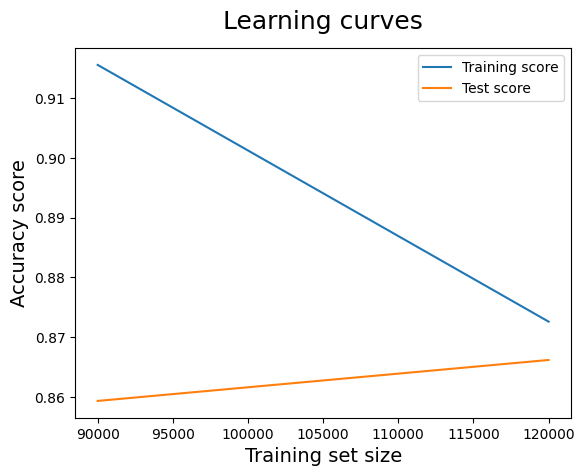

In [31]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np

# Get train scores, train sizes, and validation scores using `learning_curve`, r2 score
train_sizes, train_scores, test_scores = learning_curve(estimator = LogisticRegression(max_iter=1000),
                                                              X = X,
                                                              y = y,
                                                              train_sizes = [1000, 5000, 10000, 30000, 60000, 90000, 120000],
                                                              cv = 20)

# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot the learning curves!
plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('Accuracy score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
#plt.xlim([0, 1000])
#plt.ylim([0, 1])
plt.legend()

In [32]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets (you can adjust the test size if needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instantiate the SVM model
svm_model = SVC(kernel='linear', max_iter=1000)

# Train the model
svm_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svm_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.75


/Users/afnanalamri/.pyenv/versions/3.10.6/envs/Renewable_Energy/lib/python3.10/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/afnanalamri/.pyenv/versions/3.10.6/envs/Renewable_Energy/lib/python3.10/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/afnanalamri/.pyenv/versions/3.10.6/envs/Renewable_Energy/lib/python3.10/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/afnanalamri/.pyenv/versions/3.10.6/envs/Renewable_Energy/lib/python3.10/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre

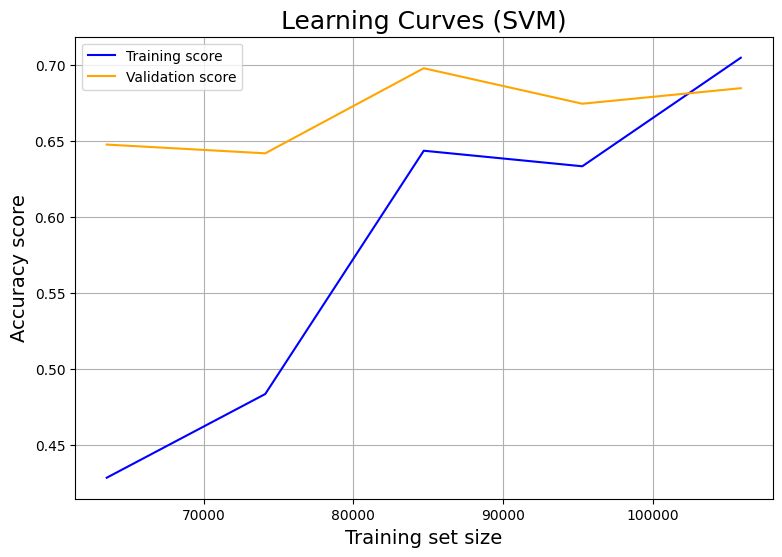

In [33]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# SVM model instantiation
svm_model = SVC(kernel='linear', max_iter=1000)

# Get train scores, train sizes, and validation scores using `learning_curve`
train_sizes, train_scores, test_scores = learning_curve(estimator=svm_model,
                                                        X=X_scaled,
                                                        y=y,
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        cv=5,
                                                        scoring='accuracy',
                                                        n_jobs=-1)

# Take the mean of train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(9,6))
plt.plot(train_sizes, train_scores_mean, label='Training score', color='blue')
plt.plot(train_sizes, test_scores_mean, label='Validation score', color='orange')

# Add labels and title
plt.ylabel('Accuracy score', fontsize=14)
plt.xlabel('Training set size', fontsize=14)
plt.title('Learning Curves (SVM)', fontsize=18)
plt.legend()
plt.grid(True)
plt.show()


*evaulute the SVM*

In [34]:
X_scaled = scaler.fit_transform(X)
print(X_scaled.shape)  # Check the number of rows in X_scaled
print(y.shape)         # Check the number of rows in y


(132344, 4)
(132344,)


/Users/afnanalamri/.pyenv/versions/3.10.6/envs/Renewable_Energy/lib/python3.10/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/afnanalamri/.pyenv/versions/3.10.6/envs/Renewable_Energy/lib/python3.10/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/afnanalamri/.pyenv/versions/3.10.6/envs/Renewable_Energy/lib/python3.10/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/afnanalamri/.pyenv/versions/3.10.6/envs/Renewable_Energy/lib/python3.10/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre

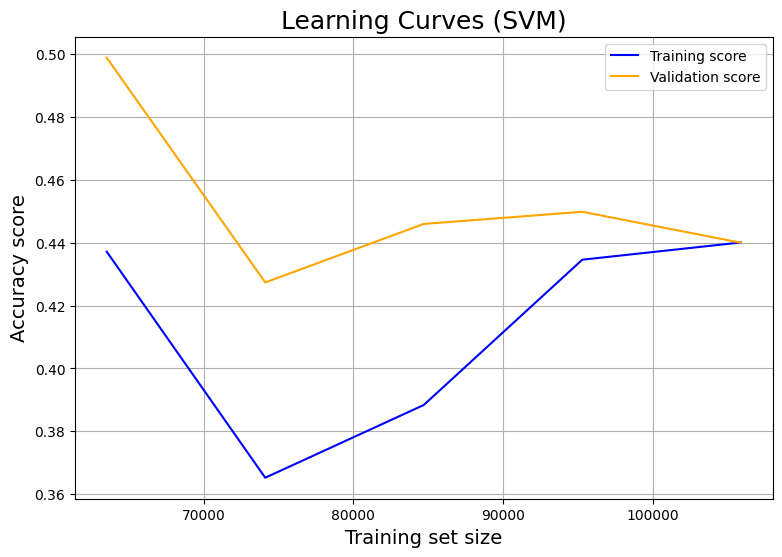

In [35]:
from sklearn.model_selection import KFold
svm_model2 = SVC(kernel='rbf', max_iter=1000)
cv = KFold(n_splits=5, shuffle=True, random_state=42)
train_sizes, train_scores, test_scores = learning_curve(estimator=svm_model2,
                                                        X=X_scaled,
                                                        y=y,
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        cv=cv,
                                                        scoring='accuracy',
                                                        n_jobs=-1)

# Take the mean of train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(9,6))
plt.plot(train_sizes, train_scores_mean, label='Training score', color='blue')
plt.plot(train_sizes, test_scores_mean, label='Validation score', color='orange')

# Add labels and title
plt.ylabel('Accuracy score', fontsize=14)
plt.xlabel('Training set size', fontsize=14)
plt.title('Learning Curves (SVM)', fontsize=18)
plt.legend()
plt.grid(True)
plt.show()


Add more featuers

In [36]:
y=combined_data['Plant_Encoded']
X_more=combined_data[['DC_POWER','DAILY_YIELD','IRRADIATION','AMBIENT_TEMPERATURE','MODULE_TEMPERATURE']]

In [37]:
print(len(X_more), len(y))

133870 133870


In [38]:
# Split the data into training and testing sets (you can adjust the test size if needed)
X_train, X_test, y_train, y_test = train_test_split(X_more, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_scaled_more = scaler.fit_transform(X_more)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instantiate the SVM model
svm_model2 = SVC(kernel='linear', max_iter=1000)

# Train the model
svm_model2.fit(X_train_scaled, y_train)

# Make predictions
y_pred2 = svm_model2.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred2)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.52


In [39]:
print(len(X_scaled_more), len(y))

133870 133870


/Users/afnanalamri/.pyenv/versions/3.10.6/envs/Renewable_Energy/lib/python3.10/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/afnanalamri/.pyenv/versions/3.10.6/envs/Renewable_Energy/lib/python3.10/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/afnanalamri/.pyenv/versions/3.10.6/envs/Renewable_Energy/lib/python3.10/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/afnanalamri/.pyenv/versions/3.10.6/envs/Renewable_Energy/lib/python3.10/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre

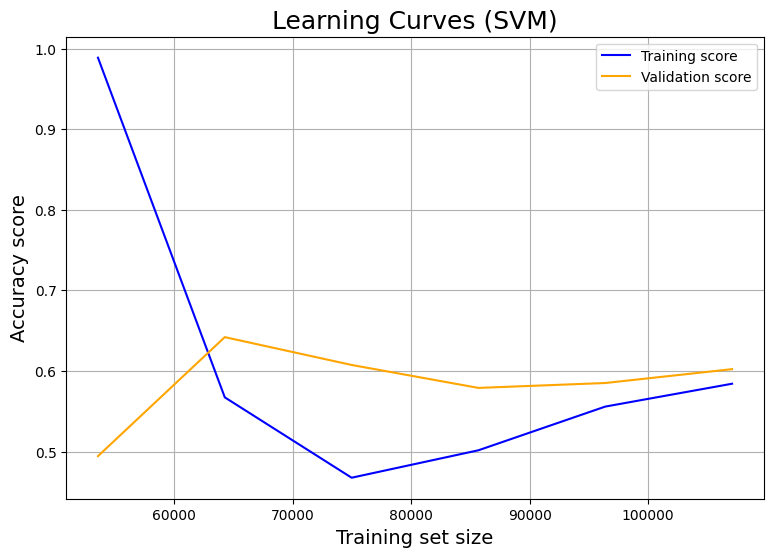

In [40]:
train_sizes, train_scores, test_scores = learning_curve(estimator=svm_model,
                                                        X=X_scaled_more,
                                                        y=y,
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        cv=5,
                                                        scoring='accuracy',
                                                        n_jobs=-1)

# Take the mean of train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(9,6))
plt.plot(train_sizes, train_scores_mean, label='Training score', color='blue')
plt.plot(train_sizes, test_scores_mean, label='Validation score', color='orange')

# Add labels and title
plt.ylabel('Accuracy score', fontsize=14)
plt.xlabel('Training set size', fontsize=14)
plt.title('Learning Curves (SVM)', fontsize=18)
plt.legend()
plt.grid(True)
plt.show()


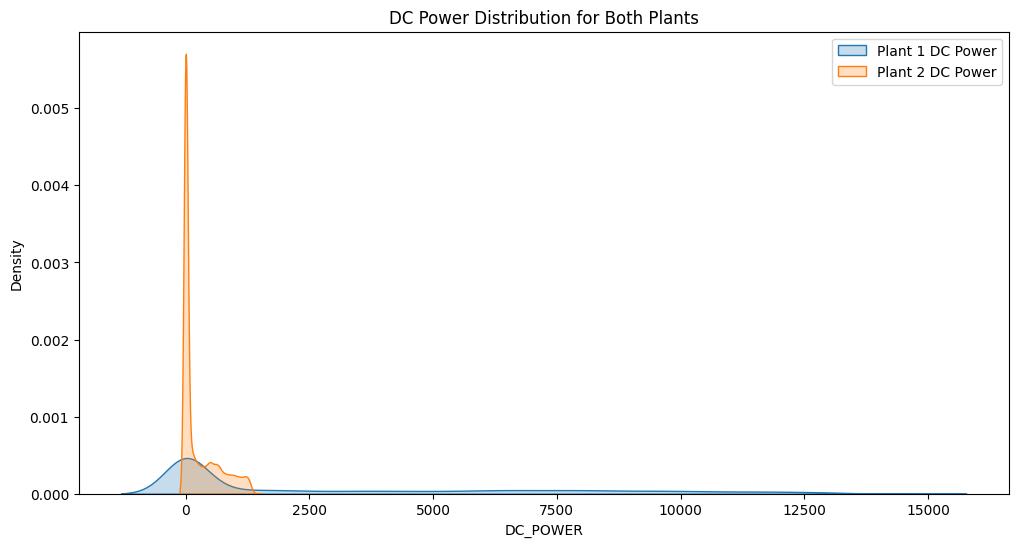

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of DC_POWER
plt.figure(figsize=(12, 6))
sns.kdeplot(generation_data1['DC_POWER'], label='Plant 1 DC Power', shade=True)
sns.kdeplot(generation_data2['DC_POWER'], label='Plant 2 DC Power', shade=True)
plt.title('DC Power Distribution for Both Plants')
plt.legend()
plt.show()

# LSTM for combind data

# Weather Sensor datasets1

In [42]:
weather_data1.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


In [43]:
weather_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            3182 non-null   datetime64[ns]
 1   PLANT_ID             3182 non-null   int64         
 2   SOURCE_KEY           3182 non-null   object        
 3   AMBIENT_TEMPERATURE  3182 non-null   float64       
 4   MODULE_TEMPERATURE   3182 non-null   float64       
 5   IRRADIATION          3182 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 149.3+ KB


In [44]:
# import numpy as np
# numeric_col= weather_data1.select_dtypes(include=np.number)


In [45]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# corr_weather= numeric_col.corr()

# plt.figure(figsize=(12, 8))
# sns.heatmap(corr_weather, annot=True, fmt='.2f', cmap='coolwarm')
# plt.title('Correlation Matrix of Weather Data')
# plt.show()

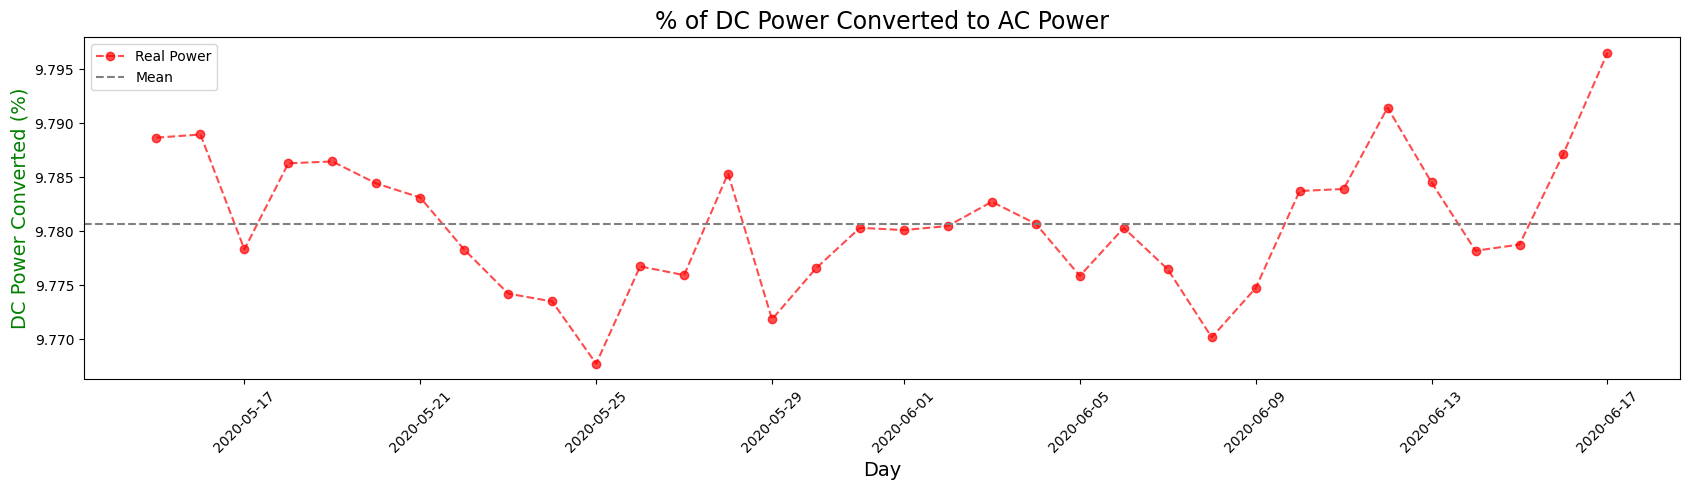

In [46]:
def plot_inverter_loss(solar1):
    # Create a copy of the DataFrame
    loss_df = solar1.copy()

    # Extract the date and group by day
    loss_df['Day'] = pd.to_datetime(loss_df['DATE_TIME']).dt.date
    loss_df = loss_df.groupby('Day').sum(numeric_only=True)

    # Calculate inverter loss
    loss_df['inverter_loss'] = (loss_df['AC_POWER'] / loss_df['DC_POWER']) * 100

    # Plot inverter loss
    plt.figure(figsize=(17, 5))
    loss_df['inverter_loss'].plot(style='o--', label='Real Power', color='red', alpha=0.7)

    # Plot mean line
    plt.axhline(loss_df['inverter_loss'].mean(), linestyle='--', color='gray', label='Mean')

    # Add titles and labels
    plt.title('% of DC Power Converted to AC Power', fontsize=17)
    plt.ylabel('DC Power Converted (%)', fontsize=14, color='green')
    plt.xlabel('Day', fontsize=14)
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_inverter_loss(solar1)

# Weather Sensor datasets2

In [47]:
weather_data2.head(5)

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
1,2020-05-15 00:15:00,4136001,iq8k7ZNt4Mwm3w0,26.880811,24.421869,0.0
2,2020-05-15 00:30:00,4136001,iq8k7ZNt4Mwm3w0,26.682055,24.427290,0.0
3,2020-05-15 00:45:00,4136001,iq8k7ZNt4Mwm3w0,26.500589,24.420678,0.0
4,2020-05-15 01:00:00,4136001,iq8k7ZNt4Mwm3w0,26.596148,25.088210,0.0


In [48]:
weather_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3259 entries, 0 to 3258
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            3259 non-null   datetime64[ns]
 1   PLANT_ID             3259 non-null   int64         
 2   SOURCE_KEY           3259 non-null   object        
 3   AMBIENT_TEMPERATURE  3259 non-null   float64       
 4   MODULE_TEMPERATURE   3259 non-null   float64       
 5   IRRADIATION          3259 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 152.9+ KB


In [49]:
weather_data2['SOURCE_KEY'].nunique()

1

# merging generation data2 and weather sensor data2

In [50]:
solar = pd.merge(generation_data2.drop(columns = ['PLANT_ID']), weather_data2.drop(columns = ['PLANT_ID', 'SOURCE_KEY']), on='DATE_TIME')
solar


,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06,27.004764,25.060789,0.0
1,2020-05-15 00:00:00,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09,27.004764,25.060789,0.0
2,2020-05-15 00:00:00,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09,27.004764,25.060789,0.0
3,2020-05-15 00:00:00,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06,27.004764,25.060789,0.0
4,2020-05-15 00:00:00,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07,27.004764,25.060789,0.0
...,...,...,...,...,...,...,...,...,...
67693,2020-06-17 23:45:00,q49J1IKaHRwDQnt,0.0,0.0,4157.000000,5.207580e+05,23.202871,22.535908,0.0
67694,2020-06-17 23:45:00,rrq4fwE8jgrTyWY,0.0,0.0,3931.000000,1.211314e+08,23.202871,22.535908,0.0
67695,2020-06-17 23:45:00,vOuJvMaM2sgwLmb,0.0,0.0,4322.000000,2.427691e+06,23.202871,22.535908,0.0
67696,2020-06-17 23:45:00,xMbIugepa2P7lBB,0.0,0.0,4218.000000,1.068964e+08,23.202871,22.535908,0.0


# EDA for solar (The merge)

In [51]:
solar.shape

(67698, 9)

In [52]:
# Adding separate time and date columns
solar["DATE"] = pd.to_datetime(solar["DATE_TIME"]).dt.date
solar["TIME"] = pd.to_datetime(solar["DATE_TIME"]).dt.time
solar['DAY'] = pd.to_datetime(solar['DATE_TIME']).dt.day
solar['MONTH'] = pd.to_datetime(solar['DATE_TIME']).dt.month
solar['WEEK'] = pd.to_datetime(solar['DATE_TIME']).dt.isocalendar().week  # Updated line

# Add hours and minutes for ML models
solar['HOURS'] = pd.to_datetime(solar['TIME'], format='%H:%M:%S').dt.hour
solar['MINUTES'] = pd.to_datetime(solar['TIME'], format='%H:%M:%S').dt.minute
solar['TOTAL MINUTES PASS'] = solar['MINUTES'] + solar['HOURS'] * 60

# Add date as string column
solar["DATE_STRING"] = solar["DATE"].astype(str)
solar["HOURS"] = solar["HOURS"].astype(str)
solar["TIME"] = solar["TIME"].astype(str)

# Display the first two rows
solar.head(2)


,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE,TIME,DAY,MONTH,WEEK,HOURS,MINUTES,TOTAL MINUTES PASS,DATE_STRING
0,2020-05-15,4UPUqMRk7TRMgml,0.0,0.0,9425.0,2.429011e+06,27.004764,25.060789,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15
1,2020-05-15,81aHJ1q11NBPMrL,0.0,0.0,0.0,1.215279e+09,27.004764,25.060789,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15


In [53]:
solar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            67698 non-null  datetime64[ns]
 1   SOURCE_KEY           67698 non-null  object        
 2   DC_POWER             67698 non-null  float64       
 3   AC_POWER             67698 non-null  float64       
 4   DAILY_YIELD          67698 non-null  float64       
 5   TOTAL_YIELD          67698 non-null  float64       
 6   AMBIENT_TEMPERATURE  67698 non-null  float64       
 7   MODULE_TEMPERATURE   67698 non-null  float64       
 8   IRRADIATION          67698 non-null  float64       
 9   DATE                 67698 non-null  object        
 10  TIME                 67698 non-null  object        
 11  DAY                  67698 non-null  int32         
 12  MONTH                67698 non-null  int32         
 13  WEEK                 67698 non-

In [54]:
solar.isnull().sum()

DATE_TIME              0
SOURCE_KEY             0
DC_POWER               0
AC_POWER               0
DAILY_YIELD            0
TOTAL_YIELD            0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
DATE                   0
TIME                   0
DAY                    0
MONTH                  0
WEEK                   0
HOURS                  0
MINUTES                0
TOTAL MINUTES PASS     0
DATE_STRING            0
dtype: int64

In [55]:
solar.describe()

,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DAY,MONTH,WEEK,MINUTES,TOTAL MINUTES PASS
count,67698,67698.000000,67698.000000,67698.000000,6.769800e+04,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000,67698.0,67698.000000,67698.000000
mean,2020-06-01 10:44:33.650625024,246.701961,241.277825,3294.890295,6.589448e+08,27.986756,32.607233,0.229204,15.530680,5.529705,22.563296,22.517061,714.329522
min,2020-05-15 00:00:00,0.000000,0.000000,0.000000,0.000000e+00,20.942385,20.265123,0.000000,1.000000,5.000000,20.0,0.000000,0.000000
25%,2020-05-23 21:00:00,0.000000,0.000000,272.750000,1.996494e+07,24.570349,23.685627,0.000000,9.000000,5.000000,21.0,15.000000,360.000000
50%,2020-06-01 23:00:00,0.000000,0.000000,2911.000000,2.826276e+08,26.910352,27.433723,0.018554,16.000000,6.000000,23.0,30.000000,720.000000
75%,2020-06-09 23:30:00,446.591667,438.215000,5534.000000,1.348495e+09,30.912601,40.019036,0.431027,22.000000,6.000000,24.0,45.000000,1080.000000
max,2020-06-17 23:45:00,1420.933333,1385.420000,9873.000000,2.247916e+09,39.181638,66.635953,1.098766,31.000000,6.000000,25.0,45.000000,1425.000000
std,NaN,370.569597,362.112118,2919.448386,7.296678e+08,4.021294,11.226446,0.309365,8.527546,0.499120,1.47473,16.764084,415.672274


In [56]:
solar['SOURCE_KEY'].nunique()

22